In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist_joan = fetch_openml('mnist_784', version =1)
mnist_joan.keys()

c:\Users\joans\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
X_joan, y_joan = mnist_joan["data"], mnist_joan["target"]

print(f'data type of X_joan: {type(X_joan)}')
print(f'data type of y_joan: {type(y_joan)}')

data type of X_joan: <class 'pandas.core.frame.DataFrame'>
data type of y_joan: <class 'pandas.core.series.Series'>


In [22]:
X_joan = X_joan.to_numpy()
y_joan = y_joan.to_numpy()

In [23]:
print(f'The data shape of X_joan is {X_joan.shape}')
print(f'The data shape of y_joan is {y_joan.shape}')

The data shape of X_joan is (70000, 784)
The data shape of y_joan is (70000,)


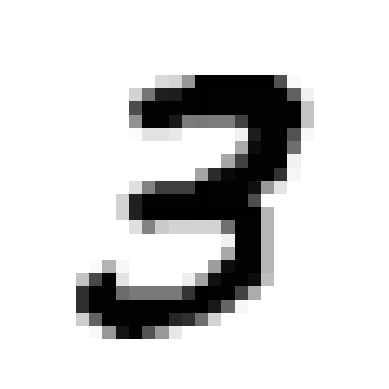

this is number:3


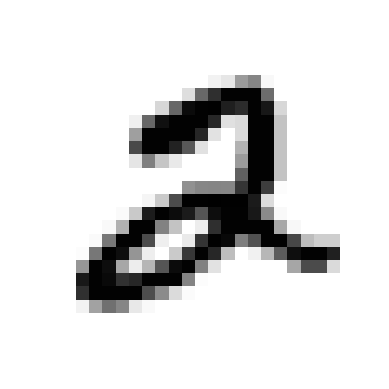

this is number:2


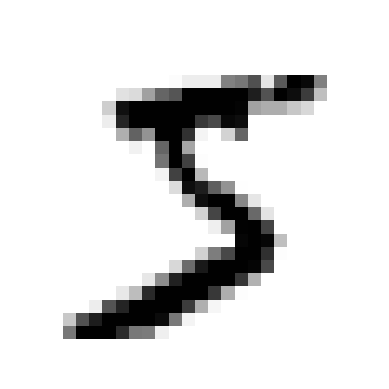

this is number:5


In [24]:
some_digit1 = X_joan[7]
some_digit2 = X_joan[5]
some_digit3 = X_joan[0]



some_digit1_image = some_digit1.reshape(28,28)
some_digit2_image = some_digit2.reshape(28,28)
some_digit3_image = some_digit3.reshape(28,28)

plt.imshow(some_digit1_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print("this is number:" + y_joan[7])

plt.imshow(some_digit2_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print("this is number:" + y_joan[5])

plt.imshow(some_digit3_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print("this is number:" + y_joan[0])

In [25]:
y_joan=y_joan.astype(np.uint8)
y_joan_class = (np.where((y_joan >= 0) & (y_joan <= 3), 0, np.where((y_joan >= 4) & (y_joan <= 6), 1, 9))).tolist()

The frequency of class 0 is: 28911
The frequency of class 1 is: 20013
The frequency of class 9 is: 21076


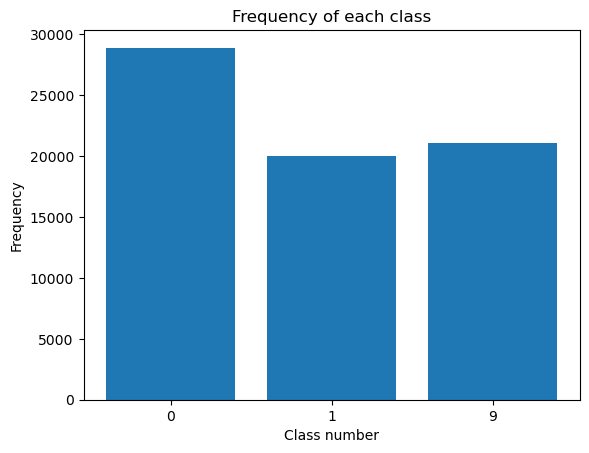

In [44]:
class0_count = y_joan_class.count(0)
class1_count = y_joan_class.count(1)
class9_count = y_joan_class.count(9)

print(f'The frequency of class 0 is: {class0_count}')
print(f'The frequency of class 1 is: {class1_count}')
print(f'The frequency of class 9 is: {class9_count}')

import matplotlib.pyplot as plt

x_axis = ['0','1','9']
y_axis = [class0_count, class1_count, class9_count]

plt.bar(x_axis, y_axis)
plt.title('Frequency of each class')
plt.xlabel('Class number')
plt.ylabel('Frequency')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = X_joan[:50000], X_joan[50000:], y_joan_class[:50000], y_joan_class[50000:]

In [28]:
from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)
NB_clf.predict([some_digit1])
NB_clf.predict_log_proba([some_digit1])
NB_clf.score(X_test,y_test)
NB_clf.classes_






array([0, 1, 9])

In [29]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_clf, X_train, y_train, cv=3, scoring="accuracy")
print ('All scores:', scores)
print  ('Average score:', scores.mean())

All scores: [0.79138417 0.77404452 0.78549142]
Average score: 0.7836400370276526


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = NB_clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Accuracy:", accuracy_score(y_test, prediction))



Confusion Matrix:
 [[6910  628  694]
 [ 666 3851 1180]
 [ 631  389 5051]]
Accuracy: 0.7906


In [31]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score: ", precision_score(y_test, prediction,average='macro'))
print("Recall: ", recall_score(y_test, prediction,average='macro'))
from sklearn.metrics import f1_score
print("F1: ",f1_score(y_test, prediction,average='macro'))

Precision Score:  0.7874783642857804
Recall:  0.7824550468195189
F1:  0.7823369073817279


In [32]:
print("Prediction for some_digit1 is: ", NB_clf.predict([some_digit1]))
print("Prediction for some_digit2 is: ", NB_clf.predict([some_digit2]))
print("Prediction for some_digit1 is: ", NB_clf.predict([some_digit3]))


Prediction for some_digit1 is:  [0]
Prediction for some_digit2 is:  [0]
Prediction for some_digit1 is:  [0]


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr_clf_joan = LogisticRegression(solver="lbfgs", max_iter=1200, tol = 0.1)
lr_clf_joan.fit(X_train, y_train)

c:\Users\joans\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1200, tol=0.1)

In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf_joan = LogisticRegression(solver="saga", max_iter=1200, tol = 0.1)
lr_clf_joan.fit(X_train, y_train)

LogisticRegression(max_iter=1200, solver='saga', tol=0.1)

In [35]:
scores = cross_val_score(lr_clf_joan, X_train, y_train, cv=3, scoring="accuracy")
print ('All scores:', scores)
print  ('Average score:', scores.mean())

All scores: [0.89266215 0.88828223 0.88551542]
Average score: 0.8888199339097341


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = lr_clf_joan.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
print("Accuracy:", accuracy_score(y_test, prediction))

Confusion Matrix:
 [[7563  280  389]
 [ 370 4987  340]
 [ 404  307 5360]]
Accuracy: 0.8955


In [37]:
print("Precision Score: ", precision_score(y_test, prediction,average='macro'))
print("Recall: ", recall_score(y_test, prediction,average='macro'))
from sklearn.metrics import f1_score
print("F1: ",f1_score(y_test, prediction,average='macro'))

Precision Score:  0.894042129009092
Recall:  0.892330210842227
F1:  0.8931381713294807


In [38]:
print("Prediction for some_digit1 is: ", lr_clf_joan.predict([some_digit1]))
print("Prediction for some_digit2 is: ", lr_clf_joan.predict([some_digit2]))
print("Prediction for some_digit3 is: ", lr_clf_joan.predict([some_digit3]))

Prediction for some_digit1 is:  [0]
Prediction for some_digit2 is:  [0]
Prediction for some_digit1 is:  [0]
